# Gradient Descent

Gradient descent is an algorithm that tries to find minima of functions. This notebook will hopefully give you some sort of intuition to what it's doing.

In [5]:
%matplotlib
# %matplotlib inline # If you want inline graphs (but non rotatable 3D plots)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

Using matplotlib backend: MacOSX


### The Function

The next block defines a function that we want to minimize and it's derivative

In [2]:
# Parameters to change what the function looks like
a = .2    # Paraboloid Term
b = 1.3   # sin(x) term
c = .8    # sin(y) term
d = .8    # ripple term
e = .2    # frequency of ripple

def f(x):
    """ Function to minimize """
    x = np.array(x)
    return a*np.linalg.norm(x*[2,1])**2 + b*np.sin(x[0]) + c*np.sin(x[1]) + d*np.sin(e*x.dot(x))
 
def df(x):
    """ Derivative of the function to minimize """
    x = np.array(x)
    return 2*a*x*[2,1] + b*np.cos(x[0]) + c*np.cos(x[1]) + d*e*2*x*np.cos(e*x.dot(x))

### Plotting

We define methods to visualize our function

In [3]:
def plot_f_3d(w_min, w_max, res):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Meshgrid
    w1 = np.linspace(w_min, w_max, res)
    w2 = np.linspace(w_min, w_max, res)
    w1v,w2v = np.meshgrid(w1,w2)
    z = np.zeros(w1v.shape)

    # Populate z's by evaluating function
    for i in range(res):
        for j in range(res):
            z[i][j] = f([w1v[i][j], w2v[i][j]])

    # Plot surface
    surf = ax.plot_surface(w1v, w2v, z, cmap=cm.coolwarm)
    plt.show()

def plot_f_2d(w_min, w_max, res):
    # Mesh grid
    w1 = np.linspace(w_min, w_max, res)
    w2 = np.linspace(w_min, w_max, res)
    w1v,w2v = np.meshgrid(w1,w2)
    z = np.zeros(w1v.shape)

    # Populate z's
    for i in range(res):
        for j in range(res):
            z[i][j] = f([w1v[i][j], w2v[i][j]])

    # Plot
    plt.imshow(z, extent=(w_min, w_max, w_max, w_min), cmap=cm.coolwarm)
    
def plot_df_2d(w_min, w_max, res):
    # Meshgrid
    w1 = np.linspace(w_min, w_max, res)
    w2 = np.linspace(w_min, w_max, res)
    w1v,w2v = np.meshgrid(w1,w2)
    u = np.zeros(w1v.shape)
    v = np.zeros(w1v.shape)
    
    # Populate
    for i in range(res):
        for j in range(res):
            u[i][j] = df([w1v[i][j], w2v[i][j]])[0]
            v[i][j] = -df([w1v[i][j], w2v[i][j]])[1]
            
    # Draw vector field
    plt.quiver(w1v, w2v, u, v, scale=50)
    plot_f_2d(w_min, w_max, res)

Now let's visualize our function in both 2D and 3D:

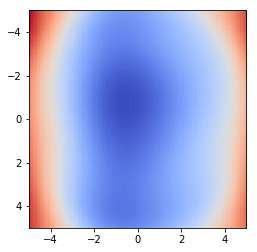

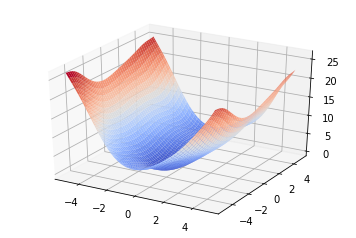

In [7]:
plot_f_2d(-5, 5, 100)
plot_f_3d(-5, 5, 100)

And visualize the vector field of the function's derivative (note the derivatives point in an "uphill" direction):

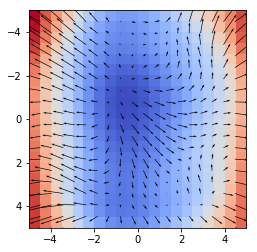

In [8]:
plot_df_2d(-5, 5, 20) #gradient = vectors point towards most change

Gradient descent works by starting at a point and then repeatedly taking very small steps in the "downhill" direction. The gradient,

$$ \vec \nabla f $$

conveniently points in the uphill direction. So every "step" of gradient descent, we update our point $ \vec x $ using the following formula:

$$ \vec x_{n+1} \leftarrow \vec x_{n} - \eta \; \vec \nabla f $$

where $ \eta $ is called the "step size." A smaller step size means convergence will be slower but you're more likely to get a more accurate estimate (intuitevly you're taking smaller, more "tentative" steps downhill) 

In [10]:
def grad_descent(x_0,y_0,eta):
    # Initial starting point
    x = np.array([x_0,y_0])
    
    # List to store points
    history = []
    
    # Gradient updates
    for i in range(150):
        history.append(np.copy(x))
        x -= eta * df(x)
        
    return np.array(history)

Method to visualize gradient descent:

In [11]:
def plot_GD(x, eta):
    w_min = -5
    w_max = 5
    res = 20
    
    hist = grad_descent(x[0], x[1], eta)
    x = [i[0] for i in hist]
    y = [i[1] for i in hist]
    
    # Plot path
    for i in range(len(x)-1):
        plt.plot(x[i:i+2],y[i:i+2], c=(float(i) / float(len(x)), .1, .1))
    
    # Plot steps
    for i in range(len(hist)):
        plt.scatter(hist[i,0], hist[i,1], c=(float(i) / float(len(hist)), 0, 1 - float(i) / float(len(hist)) ))
    #plt.scatter(hist[:,0], hist[:,1], c='cyan')
    plot_df_2d(w_min, w_max, res)

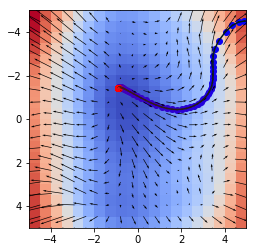

In [15]:
plot_GD([5.2, -4.5], 0.1)